# 2 MAY 2023

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Mall_Customers (1).csv")

In [3]:
dt=df.copy()

In [4]:
dt.head(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [91]:
dt.isnull().sum()   # checking wheather dataset contain Null calues or not

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [72]:
#Print Total number of Rows & columns in dataset
print(dt.shape)

(200, 5)


In [74]:
#Printing datatypes of different atributes of cluster
types = dt.dtypes
print(types)

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object


In [75]:
#Count total number of classes in Data
class_counts = dt.groupby('Genre').size()
print(class_counts)

Genre
Female    112
Male       88
dtype: int64


**Data Visualization**

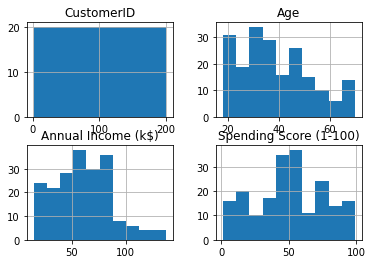

In [79]:

dt.hist()
plt.show()

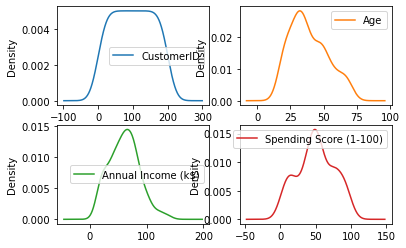

In [85]:
dt.plot(kind='density' ,subplots=True, layout=(2,2), sharex=False)
plt.show()

In [86]:
dt.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


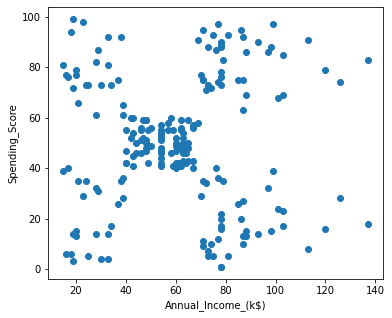

In [ ]:
plt.figure(figsize=(6,5))
plt.scatter(x=dt["Annual Income (k$)"],y=dt["Spending Score (1-100)"])
plt.xlabel('Annual_Income_(k$)')
plt.ylabel('Spending_Score')
plt.show()

**As after seeing scatter plot, it quite look like it foam a cluster of data points**

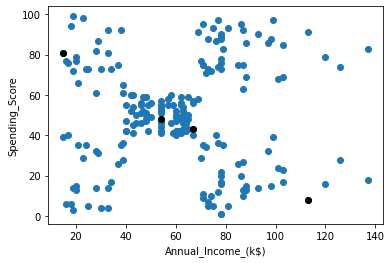

In [90]:
#Let say we work with 4 clusters
#So K=4
K=4
centroids = dt.sample(n=K)  # Randamly selecting data points for centroid.
plt.scatter(dt['Annual Income (k$)'],dt['Spending Score (1-100)'])
plt.scatter(centroids['Annual Income (k$)'],centroids['Spending Score (1-100)'],c='black')
plt.xlabel('Annual_Income_(k$)')
plt.ylabel('Spending_Score')
plt.show()

In [59]:
# Extracting features of dataset
X = dt.iloc[:,[3,4]].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [99]:
# Fitting K-Means to the dataset
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
print(kmeans)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

KMeans(n_clusters=4, random_state=42)


array([0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [94]:
print("Within cluster sum of square when k=4", kmeans.inertia_)

Within cluster sum of square when k=4 73679.78903948834


In [95]:
print("center of Cluster are", kmeans.cluster_centers_ )

center of Cluster are [[26.30434783 20.91304348]
 [86.53846154 82.12820513]
 [87.         18.63157895]
 [48.26       56.48      ]]


In [96]:
print("Number of iterations", kmeans.n_iter_) 

Number of iterations 6


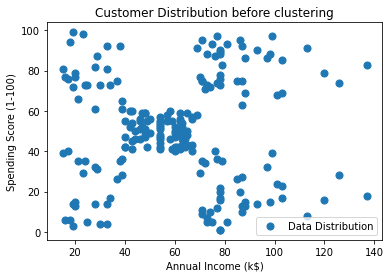

In [98]:
# Visualising the clusters before clustering
plt.scatter(X[:,0], X[:,1], s = 50, label = 'Data Distribution')
plt.title('Customer Distribution before clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [65]:
frame = pd.DataFrame(X)
frame['cluster'] = y_kmeans
frame['cluster'].value_counts()

3    100
1     39
2     38
0     23
Name: cluster, dtype: int64

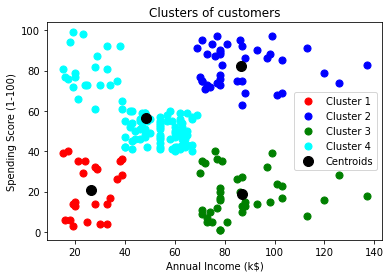

In [100]:

# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 50, c = 'cyan', label = 'Cluster 4')
#plt.scatter(X[y_kmeans== 4, 0], X[y_kmeans == 4, 1], s = 50, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [101]:

# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
     

C:\Users\Sahil Gupta\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


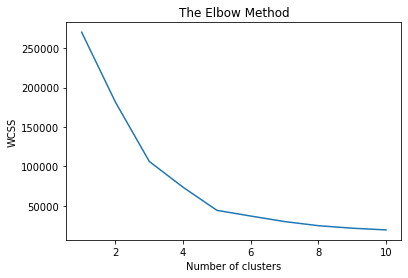

In [102]:

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()